## Data Set Description

1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type
  0: Typical angina: chest pain related decrease blood supply to the heart
  1: Atypical angina: chest pain not related to heart
  2: Non-anginal pain: typically esophageal spasms (non heart related)
  3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern

5. chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

7. restecg - resting electrocardiographic results
  0: Nothing to note
  1: ST-T Wave abnormality
  can range from mild symptoms to severe problems
  signals non-normal heart beat
  2: Possible or definite left ventricular hypertrophy
  Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest
    looks at stress of heart during excercise
    unhealthy heart will stress more

11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)

13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising

14. AHD/target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Add necessary libararies/ modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the dataset and display the first 40 records an Identify the columns ( 1 Mark )

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data (1).csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head(40)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [ ]:
label=df.columns
label

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [ ]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,39,0,nonanginal,138,220,0,0,152,0,0.0,2,0.0,normal,No
398,399,57,1,nontypical,154,232,0,2,164,0,0.0,1,1.0,normal,Yes
399,400,58,0,asymptomatic,130,197,0,0,131,0,0.6,2,0.0,normal,No
400,401,57,1,asymptomatic,110,335,0,0,143,1,3.0,2,1.0,reversable,Yes


#Check any duplicates are there using duplicated() method. Some duplicates are there. ( Hint : Unnamed: 0 - Column is creating the problem - Drop and Try)     ( 2 Marks)


*   Display number of duplcaites in the dataset



In [ ]:
df.drop('Unnamed: 0',axis=1 ,inplace=True)

In [ ]:
df.duplicated().sum()

99

In [ ]:
df.drop_duplicates()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


# Check any Null values - Identify the suitable Imputing technique for the feature **'Thal'** and apply the same.  ( 2 Marks )

In [ ]:
df.isnull().sum()

Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca           10
Thal          2
AHD           0
dtype: int64

In [ ]:
Thal_mode = df.Thal.mode()[0]
# Fill the missing values with mode value of in data.
df.Thal.fillna(Thal_mode, inplace = True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,39,0,nonanginal,138,220,0,0,152,0,0.0,2,0.0,normal,No
398,57,1,nontypical,154,232,0,2,164,0,0.0,1,1.0,normal,Yes
399,58,0,asymptomatic,130,197,0,0,131,0,0.6,2,0.0,normal,No
400,57,1,asymptomatic,110,335,0,0,143,1,3.0,2,1.0,reversable,Yes


In [ ]:
df.isnull().sum()


Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca           10
Thal          0
AHD           0
dtype: int64

# Visualize the outlier data using Box Plot for the column : chol 1 ( 1 Mark )

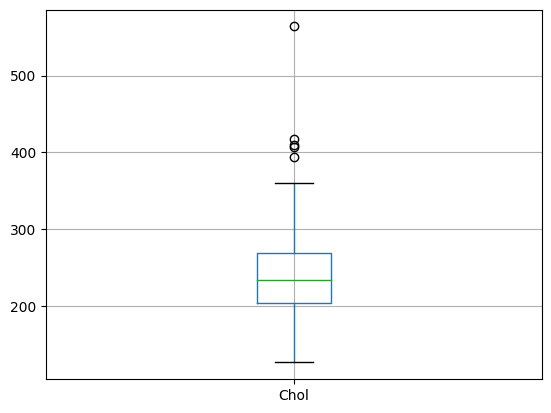

In [ ]:
#import seaborn as sns
df.boxplot(column="Chol")
plt.show()

*The* below code may be useful for five point Box Plot Summary

In [ ]:
#sorted(data['Chol'])  #Return a new list containing all items from the iterable in ascending order.
                      #A custom key function can be supplied to customize the sort order, and the
                      #reverse flag can be set to request the result in descending order.

#Q1=data['Chol'].quantile(0.25)
#Q3=data['Chol'].quantile(0.75)

#Find IQR
# Use the IQR remove the outliers in Chol

# Remove the outliers from the data set based on the column : chol ( 2 Marks) and do the box plot again for the same column. You have to use IQR values to do the same.

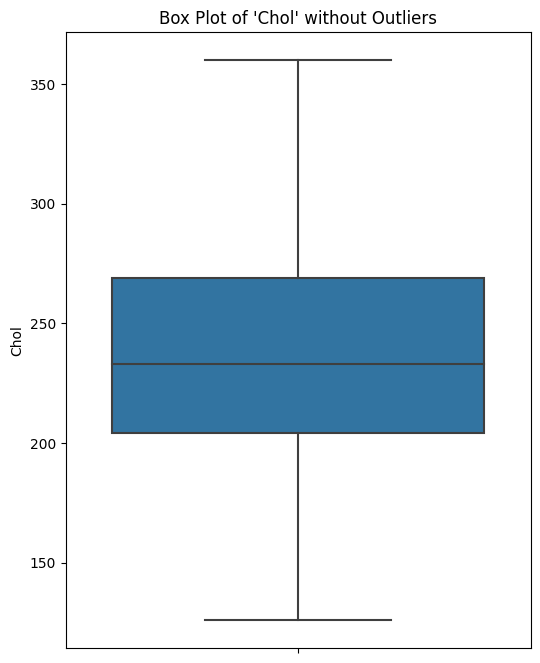

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,39,0,nonanginal,138,220,0,0,152,0,0.0,2,0.0,normal,No
398,399,57,1,nontypical,154,232,0,2,164,0,0.0,1,1.0,normal,Yes
399,400,58,0,asymptomatic,130,197,0,0,131,0,0.6,2,0.0,normal,No
400,401,57,1,asymptomatic,110,335,0,0,143,1,3.0,2,1.0,reversable,Yes


In [ ]:
#mean = df['Chol'].mean()
#std = df['Chol'].std()
#z_scores = np.abs((df['Chol'] - mean) / std)
#outliers = df[z_scores > 3 | (z_scores < -3)]
#df = df.drop(outliers.index)

Q1 = df['Chol'].quantile(0.25)
Q3 = df['Chol'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df_filtered = df[(df['Chol'] >= lower_bound) & (df['Chol'] <= upper_bound)]

# Create a box plot for the 'Chol' column after removing outliers
plt.figure(figsize=(6, 8))
sns.boxplot(data=df_filtered, y='Chol')
plt.title("Box Plot of 'Chol' without Outliers")
plt.ylabel('Chol')
plt.show()
df

## Visualize the distribution of 'age' variable ( 2 Marks )

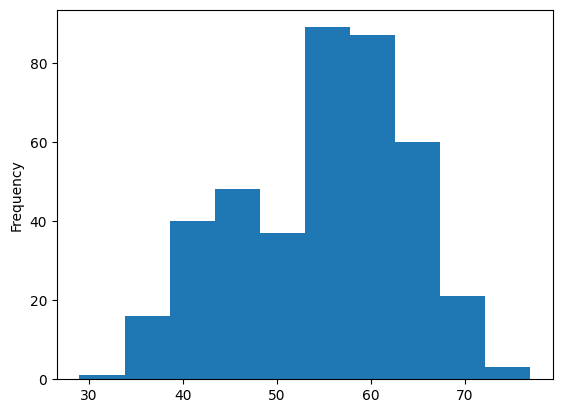

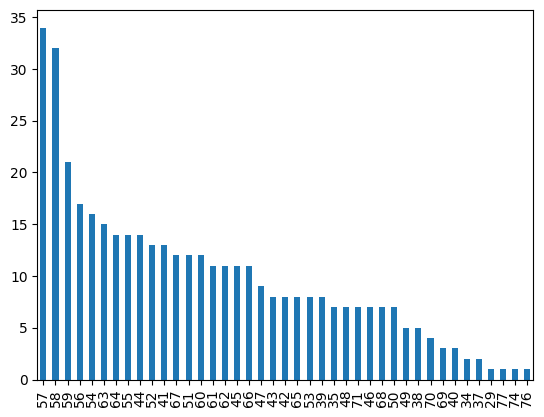

In [ ]:
df["Age"].plot.hist()
plt.show()
df.Age.value_counts().plot.bar()
plt.show()

In [ ]:
df['AHD'] = df['AHD'].map({'No': 0, 'Yes': 1})
corr_coef = df['MaxHR'].corr(df['AHD'])
print(corr_coef)

nan


In [1]:
df['AHD'] = df['AHD'].replace({'Yes': 1, 'No': 0})
correlation = df[['MaxHR','AHD']].corr()
print(correlation)

NameError: ignored